DIP ASSIGNMENT 5:
BY SRAVANTH CHOWDARY POTLURI CS20B1006

Problem statement:
1. Do histogram equalization on pout-dark and display the same
2. Do histogram matching (specification) on the pout-dark image, keeping pout-bright
as a reference image.


In [97]:
# importing the required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [98]:
# reading the image
img = cv2.imread('pout-dark.jpg', 1)

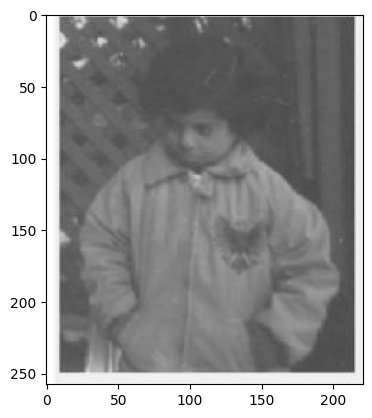

In [99]:
# displaying the image using matplotlib
plt.imshow(img)
plt.show()

In [100]:
# printing the shape of the image
print(img.shape)

(258, 221, 3)


In [101]:
# converting the image to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [102]:
# displaying the shape of the image
print(img.shape)

(258, 221)


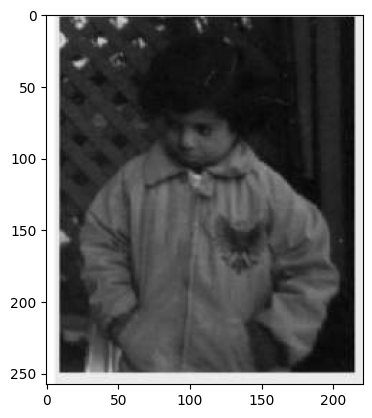

In [103]:
# displaying the image using matplotlib with grayscale
plt.imshow(img, cmap='gray')
plt.show()

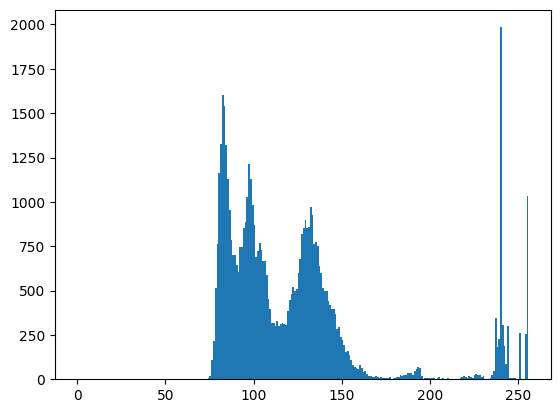

In [104]:
# displaying the histogram of the image
plt.hist(img.ravel(), 256, [0, 256])
plt.show()


In [105]:
# performing histogram equalization
img_eq = cv2.equalizeHist(img)

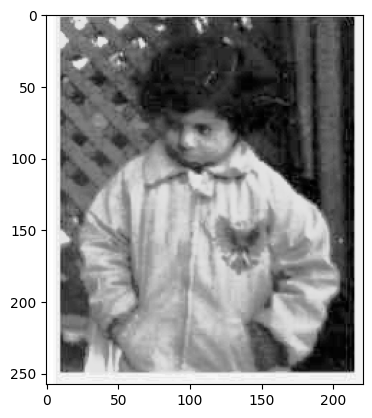

In [106]:
# displaying the image using matplotlib
plt.imshow(img_eq, cmap='gray')
plt.show()

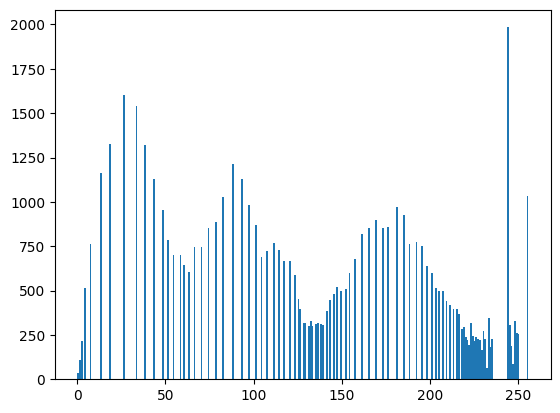

In [107]:
# displaying the histogram of the image
plt.hist(img_eq.ravel(), 256, [0, 256])
plt.show()

In [108]:
# user defined function for histogram equalization
def hist_eq(img):
    # calculating the histogram of the image
    hist, bins = np.histogram(img.ravel(), 256, [0, 256])
    # calculating the cumulative distribution function
    cdf = hist.cumsum()
    # normalizing the cdf
    cdf_normalized = cdf * hist.max() / cdf.max()
    # plotting the normalized cdf
    plt.plot(cdf_normalized, color='b')
    plt.hist(img.ravel(), 256, [0, 256], color='r')
    plt.xlim([0, 256])
    plt.legend(('cdf', 'histogram'), loc='upper left')
    plt.show()
    # creating the output image
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    img2 = cdf[img]
    return img2

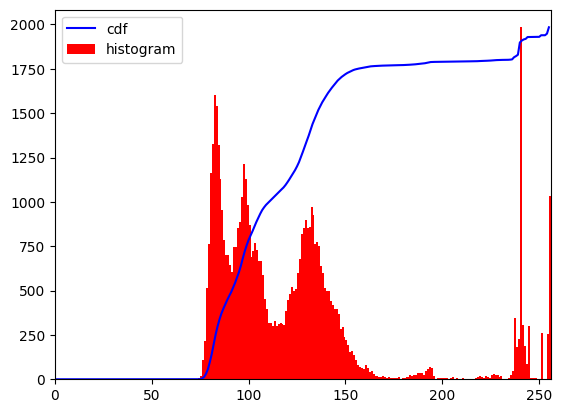

In [109]:
# calling the user defined function
img2 = hist_eq(img)

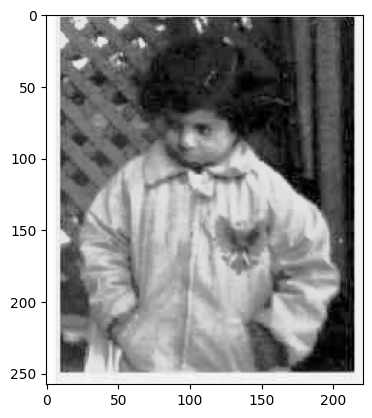

In [110]:
# displaying the image using matplotlib
plt.imshow(img2, cmap='gray')
plt.show()

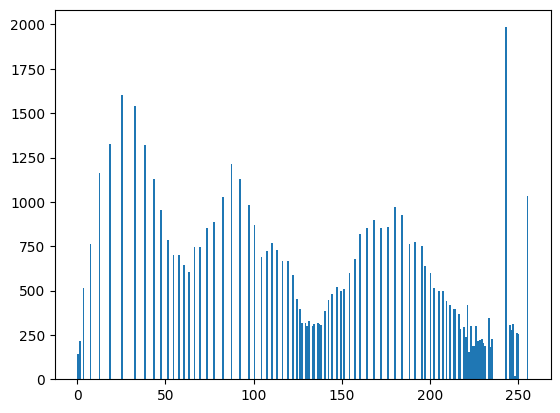

In [111]:
# displaying the histogram of the image
plt.hist(img2.ravel(), 256, [0, 256])
plt.show()


In [112]:
# loading the image
img_bright = cv2.imread('pout-bright.jpg', 1)

In [113]:
# converting the image to grayscale
img_bright = cv2.cvtColor(img_bright, cv2.COLOR_BGR2GRAY)

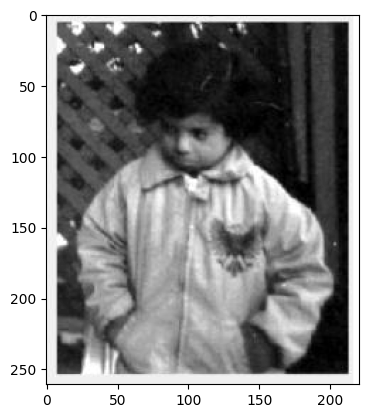

In [114]:
# displaying the image using matplotlib
plt.imshow(img_bright, cmap='gray')
plt.show()

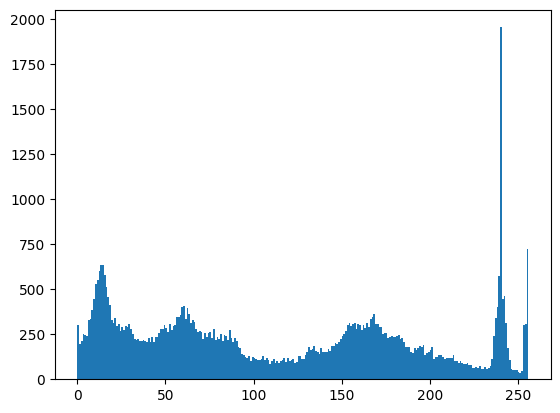

In [115]:
# displaying the histogram of the image
plt.hist(img_bright.ravel(), 256, [0, 256])
plt.show()

In [118]:
# user defined function for histogram matching of two images
def hist_match(source, template):
    # calculating the histogram of the source image
    oldshape = source.shape
    source = source.ravel()
    # calculating the histogram of the template image
    template = template.ravel()
    # calculating the histogram of the source image
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True, return_counts=True)
    # calculating the histogram of the template image
    t_values, t_counts = np.unique(template, return_counts=True)
    # calculating the quantiles of the source image
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    # calculating the quantiles of the template image
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]
    # mapping the quantiles of the source image to the quantiles of the template image
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)
    return interp_t_values[bin_idx].reshape(oldshape)

In [119]:
# calling the user defined function by using img_bright as template
img2 = hist_match(img, img_bright)


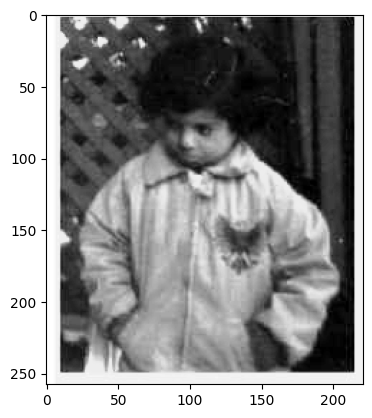

In [120]:
# displaying the image using matplotlib
plt.imshow(img2, cmap='gray')
plt.show()

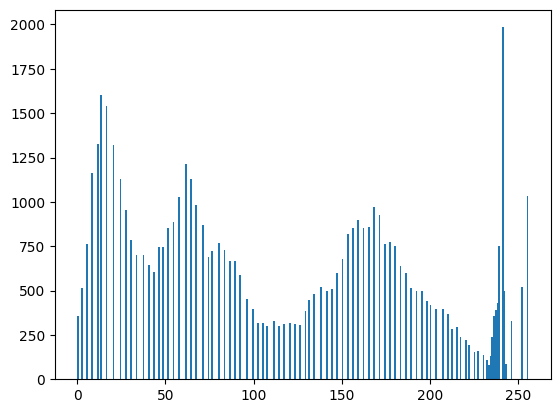

In [121]:
# displaying the histogram of the image
plt.hist(img2.ravel(), 256, [0, 256])
plt.show()